# Exploratory Data Analysis: Rating and Revenue

### Libraries to import:

In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load in our dataset:

In [7]:
combined = pd.read_csv('../zippedData/combined.csv') # Load in our combined dataset.
combined

,Unnamed: 0,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...,...
18295,2995,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,2996,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,2997,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,2998,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Data Cleaning:

We are concatenating several dataframes so their indexes are shared. We reset the index so they are unique.

In [44]:
combined.reset_index(inplace=True) # Reset index due to concatenation.

Now we have to remove the extra column of old indexes.

In [45]:
combined = combined.drop('Unnamed: 0', axis=1)  # Remove extra index column from resetting index. 

Let's make sure that our changes have been successful.

In [46]:
combined # Examine changes.

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...,...
18295,18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83



For visualization we need our rating to be a numerical value so we will do an explicit type check to make sure.

In [7]:
combined.rating.dtype # Confirm the rating is numeric type.

dtype('float64')

Cleaning our rating and rating_pop columns by removing commas and any missing values in either column.

In [8]:
combined['rating_pop'] = combined.rating_pop.str.replace(',', '') # Remove commas.
combined.dropna(inplace = True, subset=['rating', 'rating_pop'])  # Remove missing values from rating and rating_pop.
combined                                                          #

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,580863
1,1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,85315
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,120895
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,157134
4,4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,2864
...,...,...,...,...,...,...,...,...,...,...,...
18291,18291,https://www.imdb.com/title/tt10370380/,The Windermere Children,2020,"['Drama', 'War']",NaN,NaN,NaN,NaN,7.3,1577
18292,18292,https://www.imdb.com/title/tt11127878/,Milea,2020,"['Drama', 'Romance']",NaN,NaN,NaN,NaN,6.2,187
18293,18293,https://www.imdb.com/title/tt11358398/,The Man Standing Next,2020,"['History', 'Thriller']","$113,527",NaN,"$34,664,900",NaN,7.0,822
18297,18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27


### Data Visualization for Rating Distribution:

Now we get to start visualizing. Let's plot the distribution of user ratings.

Text(6.55, 0.1, 'Breakeven Point')

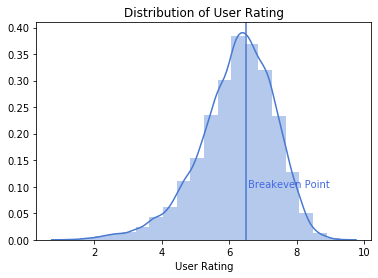

In [40]:
sns.distplot(combined.rating, bins = 20)                  # Plot movie rating distribution. 
plt.title('Distribution of User Rating')                  # Set title.
plt.xlabel('User Rating')                                 # Set x-axis label.
plt.axvline(x = 6.5)                                      # Create a vertical line at the breakeven point.
plt.text(6.55,0.1,'Breakeven Point', color = 'royalblue') # Create text on graph.

As we can see, the mean user rating is about a 6.25 out of 10. And there's a slight negative skew, possibly because users are more likely to go and rate movies they didn't like, and 10 out of 10 reviews are very rare.

### Data Cleaning P.2: Incorporating Revenue

Now let's try to incorporate worldwide gross revenue and see how it relates to a movie's rating.

We need to drop missing values from the worldwide_gross column.

In [26]:
combined_gross = combined.dropna(subset=['worldwide_gross']) # Drop missing values from worldwide gross. 

Now let's clean the remaining entries by removing commas and stripping the dollar signs. 

In [27]:
combined_gross['worldwide_gross'] = combined_gross.worldwide_gross.str.replace(',', '') # Remove commas and dollar 
combined_gross['worldwide_gross'] = combined_gross.worldwide_gross.str.strip('$')       # signs. 

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Examine our changes. Looking good. 

In [28]:
combined_gross # Examine changes.

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947",32000000,NaN,8.5,580863
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000",1836351,NaN,7.9,120895
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000",177066,NaN,8.3,157134
5,5,https://www.imdb.com/title/tt0054357/,Swiss Family Robinson,1960,"['Adventure', 'Family']","$40,356,000","$5,000,000",40356000,NaN,7.2,13620
7,7,https://www.imdb.com/title/tt0053779/,La Dolce Vita,1960,"['Comedy', 'Drama']",NaN,NaN,171140,NaN,8.0,63887
...,...,...,...,...,...,...,...,...,...,...,...
18277,18277,https://www.imdb.com/title/tt9537292/,Ala Vaikunthapurramuloo,2020,"['Action', 'Drama']",NaN,NaN,631683,NaN,7.2,5734
18280,18280,https://www.imdb.com/title/tt10816484/,18 Presents,2020,['Drama'],NaN,"EUR2,500,000",3486375,NaN,6.7,1952
18282,18282,https://www.imdb.com/title/tt8415352/,The Murder of Nicole Brown Simpson,2020,"['Crime', 'Thriller']",NaN,NaN,8931,R,2.2,789
18290,18290,https://www.imdb.com/title/tt7095476/,Waiting for Anya,2020,"['Drama', 'Thriller', 'War']",NaN,"$10,000,000",36404,NaN,5.6,431


Now that we have removed special characters we need to recast the column from an object 'O' to an 'int64'.

In [29]:
combined_gross.worldwide_gross.dtype # Worldwide gross is 'object' type. Need to recast as numeric. 

dtype('O')

We also had two non-USD entries that we removed manually. 

In [30]:
combined_gross.worldwide_gross.drop([11895, 12556], axis=0, inplace=True) # This throws a warning because altering a
                                                                          # copy of the original dataframe. But let the
                                                                          # change go through.

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


In [31]:
combined_gross

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947",32000000,NaN,8.5,580863
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000",1836351,NaN,7.9,120895
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000",177066,NaN,8.3,157134
5,5,https://www.imdb.com/title/tt0054357/,Swiss Family Robinson,1960,"['Adventure', 'Family']","$40,356,000","$5,000,000",40356000,NaN,7.2,13620
7,7,https://www.imdb.com/title/tt0053779/,La Dolce Vita,1960,"['Comedy', 'Drama']",NaN,NaN,171140,NaN,8.0,63887
...,...,...,...,...,...,...,...,...,...,...,...
18277,18277,https://www.imdb.com/title/tt9537292/,Ala Vaikunthapurramuloo,2020,"['Action', 'Drama']",NaN,NaN,631683,NaN,7.2,5734
18280,18280,https://www.imdb.com/title/tt10816484/,18 Presents,2020,['Drama'],NaN,"EUR2,500,000",3486375,NaN,6.7,1952
18282,18282,https://www.imdb.com/title/tt8415352/,The Murder of Nicole Brown Simpson,2020,"['Crime', 'Thriller']",NaN,NaN,8931,R,2.2,789
18290,18290,https://www.imdb.com/title/tt7095476/,Waiting for Anya,2020,"['Drama', 'Thriller', 'War']",NaN,"$10,000,000",36404,NaN,5.6,431


Now we can recast the column. 

In [32]:
combined_gross['worldwide_gross'] = combined_gross.worldwide_gross.astype('int64') # This throws a warning due to
                                                                                   # altering a copy of the dataframe.

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


And we can confirm the data type of the column is now a numerical value. 

In [33]:
combined_gross.worldwide_gross.dtype # Confirm that worldwide_gross is numerical.

dtype('float64')

### Data Visualization:

Now we can visualize the average worldwide gross revenue for each user rating. 

Text(48.5, 200000000, 'Breakeven Point')

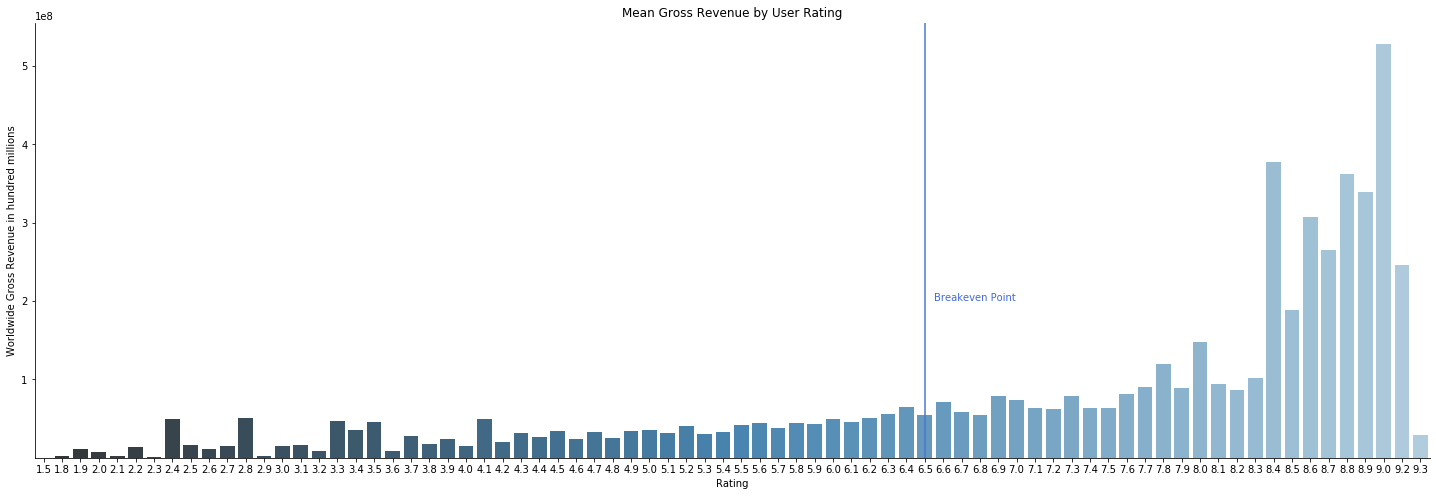

In [42]:
plt.figure(figsize=(25, 8))                                     # Set figure size. 
sns.barplot(x = 'rating', y = 'worldwide_gross', data = combined_gross, ci=None, palette='Blues_d')
plt.yticks(np.arange(100000000, 600000000, 100000000))          # Setting axis labels and ticks. 
plt.title('Mean Gross Revenue by User Rating')                  # 
plt.ylabel('Worldwide Gross Revenue in hundred millions')       #
plt.xlabel('Rating')                                            #
sns.despine()                                                   #
plt.axvline(x = 48)                                             # There are 76 x values, hence 48 aligning with a 6.5 
plt.text(48.5,200000000,'Breakeven Point', color = 'royalblue') # rating (breakeven rating).

Movies that are rated poorly do not have high worldwide gross revenue. We also transposed our calculated breakeven point rating of 6.5 unto this graph. On average, movies that score a user rating above this threshold earn a profit. And at the extreme, movies that score a 8.4 or above have very high revenues. 

### Insights:

The average movie has a user rating on IMDB of about 6 out of 10. Comparing the respective budgets versus worldwide gross revenue suggests that movies with a user rating of 6.5 or greater have a positive return on investment. The key insights from this data are, that with an average rating of about 6 and the mean breakeven point being 6.5, about as many movies lose money as make money. Movies that make their budget back should have a rating greater than 6.5. That is, you should aim to make a highly rated film. While this seems obvious, there have been many examples of big summer blockbusters that flop at the box office due to poor reviews even with ample budget. 